## 要約生成

### データセット

#### データセットのダウンロード

In [1]:
from datasets import load_dataset

# データセットを読み込む
dataset = load_dataset("llm-book/livedoor-news-corpus")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration default
Reusing dataset livedoor-news-corpus (/root/.cache/huggingface/datasets/llm-book___livedoor-news-corpus/default/0.0.0/0e68df407299550ef5ff2e77547963ebf3cb31cdf6cb53be6ab1aac47965d5dd)
100%|██████████| 3/3 [00:00<00:00, 235.45it/s]


In [2]:
# データセットの形式と事例数を表示する
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 5893
    })
    validation: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 736
    })
    test: Dataset({
        features: ['url', 'date', 'title', 'content', 'category'],
        num_rows: 738
    })
})


In [3]:
from pprint import pprint

# 訓練セットの最初の2つの事例を表示する
pprint(list(dataset["train"])[:2])

[{'category': 'livedoor-homme',
  'content': '日常の何気ない気持ちをTwitterにつぶやいたり、実名登録のFacebookで懐かしい友人と再会したり、SNSはもはや我々の生活において欠かせない存在となりつつある。先日、国内の月間利用者数が1,000万人を突破し、mixi（1,520万人、2011年12月現在）を追い抜くのも時間の問題と思われるFacebookでは、診断やゲームなど様々なアプリが生まれ、ユーザーのタイムラインを今日も賑わしている。しかし、その一方で、Facebookを悪用するケースもまた徐々に増え始めている。  '
             'Facebookでは、2008年1月にAPIが公開されて以来、様々なアプリが誕生しているが、同年8月にはボット型の不正プログラム「KOOBFACE」が確認され、感染を広げた。その手口とは、「あなたがビデオに出ていますよ！」というメッセージが届き、YouTubeに偽装したURLにアクセスすると、動画再生のためにプログラムのインストールを求められ、不正プログラムをダウンロードさせるというもの。  '
             '不正プログラムには、画面に偽の感染警告を表示し、駆除のための偽セキュリティソフトを購入させ、クレジットカード情報などの個人情報を盗むものや、ブラウザでログイン時のアカウント情報を盗むものなどが存在。更に、そのユーザーのFacebookフレンド宛にも不正なメッセージを自動送信することによって、感染規模を拡大していくのだ。  '
             '2010年12月にはFacebookの公式アカウントを騙り、不正プログラムをインストールさせようとするスパムメールや、2011年1月にはアカウントの更新に必要として、個人情報を盗むフィッシングサイトを確認。その他にも、可愛らしい女性のプロフィール画像を載せた人物から好意的なメッセージが届き、携帯アドレスへの連絡を求めるスパムメッセージなど、その手口は年々多様化している。  '
             'Facebookのみならず、今年1月にはTwitter公式アカウントを騙るフィッシング詐欺サイトも確認され、昨年12月の警察庁による発表では、SNS以外にもフィッシング詐欺で約2,000万円、不正

#### データセットの分析

In [4]:
from collections import Counter

# 各カテゴリの事例数を確認する
pprint(Counter(dataset["train"]["category"]).most_common())

[('sports-watch', 731),
 ('it-life-hack', 718),
 ('dokujo-tsushin', 695),
 ('smax', 690),
 ('movie-enter', 689),
 ('peachy', 677),
 ('kaden-channel', 656),
 ('topic-news', 616),
 ('livedoor-homme', 421)]


In [5]:
categories = set() # カテゴリの集合
for data in dataset["train"]: # 訓練セットの各事例を処理する
    category, title = data["category"], data["title"]
    # すでに出現しているカテゴリはスキップ
    if category not in categories:
        categories.add(category)
        print(f"{category}: {title}")

livedoor-homme: 急成長を遂げるFacebookに忍び寄る影
it-life-hack: いつでもどこでも自分専用環境！　Ubuntu起動ができるUSBメモリーを作成！【デジ通】
kaden-channel: 「PS Vita」がついに発売　—　初日は待ちわびたファンが行列を作る大盛況【話題】
smax: ソニーモバイル、Xperia ionのLTE非対応版「Xperia ion HSPA」を発表
peachy: 【終了しました】リムジンでお買い物の後はスイートルームで“うっとろりん”、お姫さまのような1日をプレゼント
movie-enter: 有言実行の男、ジュード・ロウが自信作を引っ提げ来日決定
dokujo-tsushin: 言いにくい「芸能人の○○みたいにして」の一言
sports-watch: 日本代表敗戦、セルジオ越後氏は「ベストメンバーでなければこの程度」
topic-news: 「柏木はブタ鼻」嫉妬ややっかみからAKB48で流行るイジメごっこ


In [6]:
# !pip install japanize-matplotlib

100%|██████████| 5893/5893 [00:08<00:00, 734.32it/s]


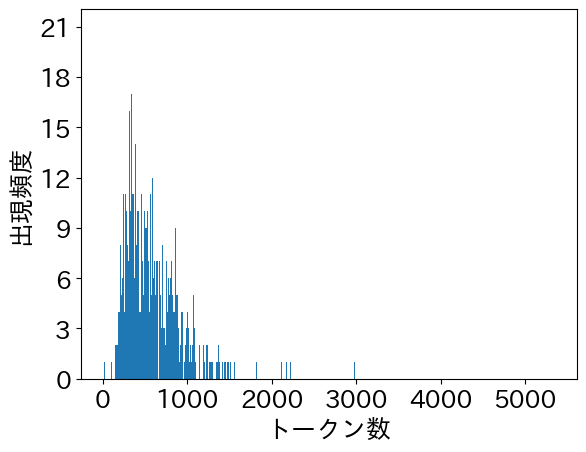

100%|██████████| 5893/5893 [00:01<00:00, 5349.92it/s]


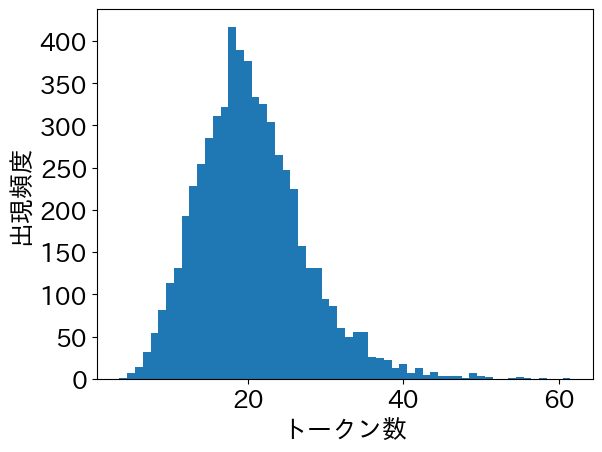

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from tqdm import tqdm
from transformers import AutoTokenizer, PreTrainedTokenizer
import japanize_matplotlib

# フォントサイズ変更
plt.rcParams["font.size"] = 18

def visualize_num_tokens_distribution(
    dataset: Dataset,
    tokenizer: PreTrainedTokenizer,
    column: str
) -> None:
    """トークン数の分布を可視化"""
    # 各事例でトークン数をカウントし、トークン数毎に結果を集約する
    counter = Counter()
    for data in tqdm(dataset):
        num_tokens = len(tokenizer.tokenize(data[column]))
        counter[num_tokens] += 1
        
    # トークン数の分布を可視化
    plt.bar(counter.keys(), counter.values(), width=1.0)
    plt.xlabel("トークン数")
    plt.ylabel("出現頻度")
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter("%d"))
    plt.show()
    
# トークナイザを読み込む
model_name = "retrieva-jp/t5-base-long"
tokenizer = AutoTokenizer.from_pretrained(model_name)
# 記事のトークン数の分布を可視化する
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "content"
)
# 見出しのトークン数の分布を可視化する
visualize_num_tokens_distribution(
    dataset["train"], tokenizer, "title"
)

### 評価指標

In [8]:
# !pip install mecab-python3 rouge-score sacrebleu bert_score

#### ROUGE

In [9]:
reference = "日本語T5モデルの公開"
prediction1 = "T5モデルの日本語版を公開"
prediction2 = "日本語T5をリリース"
prediction3 = "Japanese T5を発表"

In [10]:
import ipadic
import MeCab

# IPAdicを用いたMeCabを使用して、単語分割を行う
tagger = MeCab.Tagger(f"-O wakati {ipadic.MECAB_ARGS}")
ref_wakati = tagger.parse(reference).strip()
pred_wakati1 = tagger.parse(prediction1).strip()
pred_wakati2 = tagger.parse(prediction2).strip()
pred_wakati3 = tagger.parse(prediction3).strip()
print(f"参照文: {ref_wakati}")
print(f"生成文1: {pred_wakati1}")
print(f"生成文2: {pred_wakati2}")
print(f"生成文3: {pred_wakati3}")

参照文: 日本語 T 5 モデル の 公開
生成文1: T 5 モデル の 日本語 版 を 公開
生成文2: 日本語 T 5 を リリース
生成文3: Japanese T 5 を 発表


In [11]:
### ROUGEを算出
from collections import defaultdict
import pandas as pd
from datasets import load_metric

# pandasの小数点以下の桁数を設定
pd.options.display.precision = 3

def convert_words_to_ids(
    predictions: list[str],
    references: list[str]
) -> tuple[list[str], list[str]]:
    """単語列をID列に変換"""
    # 単語にユニークなIDを割りあてるためのdefaultdictを作成
    word2id = defaultdict(lambda: len(word2id))
    
    # 単語区切りの文字列をID大文字に変換する
    pred_ids = [
        " ".join([str(word2id[w]) for w in p.split()])
        for p in predictions
    ]
    ref_ids = [
        " ".join([str(word2id[w]) for w in r.split()])
        for r in references
    ]
    return pred_ids, ref_ids

def compute_rouge(
    predictions: list[str],
    references: list[str]
) -> dict[str, dict[str, float]]:
    """ROUGEを算出"""
    # ROUGEをロードする
    rouge = load_metric("rouge")
    # 単語列をID列に変換する
    pred_ids, ref_ids = convert_words_to_ids(predictions, references)
    # 単語ID列を評価対象に加える
    rouge.add_batch(predictions=pred_ids, references=ref_ids,)
    # ROUGEスコアを計算する
    scores = rouge.compute(rouge_types=["rouge1", "rouge2", "rougeL"])
    return {k: v.mid for k,v in scores.items()}

# ROUGEを算出した結果を表示する
rouge_results = {
    "生成文1": compute_rouge([pred_wakati1], [ref_wakati]),
    "生成文2": compute_rouge([pred_wakati2], [ref_wakati]),
    "生成文3": compute_rouge([pred_wakati3], [ref_wakati])
}
df_list = [
    pd.DataFrame.from_dict(rouge_results[k], orient="index")
    for k in rouge_results.keys()
]
display(pd.concat(df_list, keys=rouge_results.keys(), axis=1).T)

rouge1  rouge2  rougeL
生成文1 precision   0.750   0.429   0.625
     recall      1.000   0.600   0.833
     fmeasure    0.857   0.500   0.714
生成文2 precision   0.600   0.500   0.600
     recall      0.500   0.400   0.500
     fmeasure    0.545   0.444   0.545
生成文3 precision   0.400   0.250   0.400
     recall      0.333   0.200   0.333
     fmeasure    0.364   0.222   0.364

### BLEU

#### BLEUを算出するための実装

In [12]:
def compute_bleu(
    predictions: list[str],
    references: list[str]
) -> dict[str, int | float | list[float]]:
    """BLUEを算出"""
    bleu = load_metric("sacrebleu")
    # 単語列を評価対象に追加
    bleu.add_batch(predictions=predictions, references=references)
    # BLEUを計算する
    results = bleu.compute()
    results["precisions"] = [
        round(p, 2) for p in results["precisions"]
    ]
    return results

# BLEUを算出した結果を表示する
bleu_results = {
    "生成文1": compute_bleu([pred_wakati1], [[ref_wakati]]),
    "生成文2": compute_bleu([pred_wakati2], [[ref_wakati]]),
    "生成文3": compute_bleu([pred_wakati3], [[ref_wakati]]),
}
df_list = [
    pd.DataFrame.from_dict(bleu_results[k], orient="index")[0]
    for k in bleu_results.keys()
]
display(pd.concat(df_list, keys=bleu_results.keys(), axis=1).T)

,score,counts,totals,precisions,bp,sys_len,ref_len
生成文1,38.26,"[6, 3, 2, 1]","[8, 7, 6, 5]","[75.0, 42.86, 33.33, 20.0]",1.0,8,6
生成文2,32.556,"[3, 2, 1, 0]","[5, 4, 3, 2]","[60.0, 50.0, 33.33, 25.0]",0.819,5,6
生成文3,17.492,"[2, 1, 0, 0]","[5, 4, 3, 2]","[40.0, 25.0, 16.67, 12.5]",0.819,5,6


#### BERTScore

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


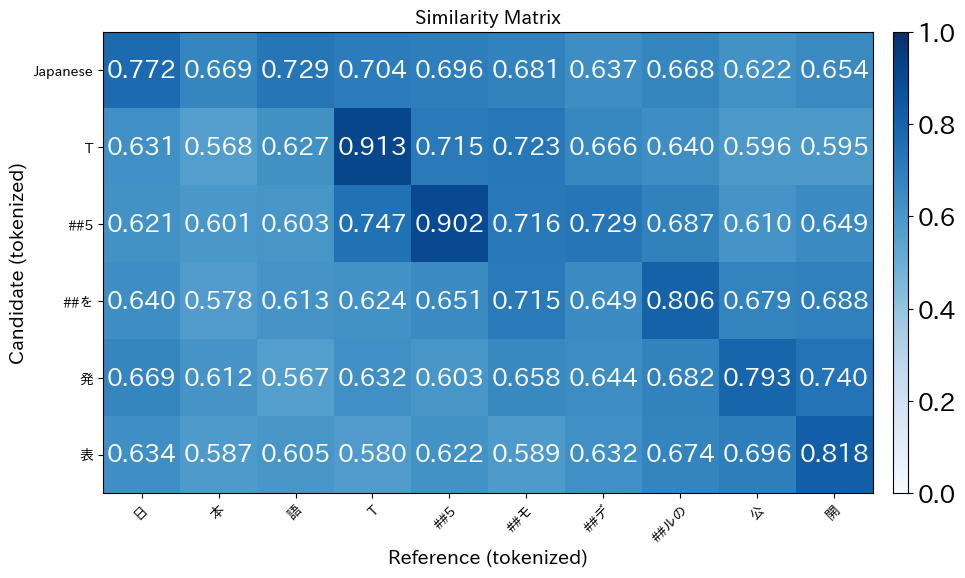

In [13]:
from bert_score import plot_example

# 生成文3と参照文の類似度行列を作成する
plot_example(prediction3, reference, lang="ja")

#### BERTScoreを算出するための実装

In [14]:
def compute_bertscore(
    predictions: list[str],
    references: list[str]
) -> dict[str, float]:
    """BERTScoreを算出"""
    # BERTScoreをロードする
    bertscore = load_metric("bertscore")
    # 文字列を評価対象に加える
    bertscore.add_batch(
        predictions=predictions,
        references=references
    )
    # BERTScoreを計算
    results = bertscore.compute(lang="ja")
    return {
        k: sum(v) / len(v)
        for k,v in results.items()
        if k != "hashcode"
    }
    
# BERTScoreを算出した結果を表示する
bertscore_results = {
    "生成文1": compute_bertscore([prediction1], [reference]),
    "生成文2": compute_bertscore([prediction2], [reference]),
    "生成文3": compute_bertscore([prediction3], [reference]),
}
df_list = [
    pd.DataFrame.from_dict(bertscore_results[k], orient="index")[0]
    for k in bertscore_results.keys()
]
display(pd.concat(df_list, keys=bertscore_results.keys(), axis=1).T)

,precision,recall,f1
生成文1,0.877,0.903,0.890
生成文2,0.879,0.824,0.850
生成文3,0.834,0.785,0.809


### 見出し生成モデルの実装

#### T5のファインチューニング

#### データセットの前処理

In [15]:
from typing import Any
from transformers import BatchEncoding, PreTrainedTokenizer

def preprocess_data(
    data: dict[str, Any],
    tokenizer: PreTrainedTokenizer
) -> BatchEncoding:
    """データの前処理"""
    # 記事のトークナイゼーションを行う
    inputs = tokenizer(
        data["content"], max_length=512, truncation=True
    )
    # 見出しのトークナイゼーションを行う
    # 見出しはトークンIDのみ使用する
    inputs["labels"] = tokenizer(
        data["title"], max_length=128, truncation=True
    )["input_ids"]
    return inputs

# 訓練セットに対して前処理を行う
train_dataset = dataset["train"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["train"].column_names,
)
# 検証セットに対して前処理を行う
validation_dataset = dataset["validation"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["validation"].column_names,
)

100%|██████████| 736/736 [00:01<00:00, 632.36ex/s]


#### モデルのファインチューニング

In [16]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

# モデルを読み込む
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
# collate関数にDataCollatorForSeq2Seqを用いる
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [17]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers.trainer_utils import set_seed

# 乱数シードを42に固定する
set_seed(42)

# Trainerに渡す引数を初期化
training_args = Seq2SeqTrainingArguments(
    output_dir="../model/output_t5_summarization",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-4,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

# Trainerを初期化する
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)

# 訓練する
trainer.train()

PyTorch: setting up devices
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5893
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1845


Epoch,Training Loss,Validation Loss
1,4.278700,2.040095
2,2.399800,1.925279
3,2.170300,1.881035
4,2.042600,1.871904
5,1.972300,1.872137


***** Running Evaluation *****
  Num examples = 736
  Batch size = 16
Saving model checkpoint to ../model/output_t5_summarization/checkpoint-369
Configuration saved in ../model/output_t5_summarization/checkpoint-369/config.json
Model weights saved in ../model/output_t5_summarization/checkpoint-369/pytorch_model.bin
tokenizer config file saved in ../model/output_t5_summarization/checkpoint-369/tokenizer_config.json
Special tokens file saved in ../model/output_t5_summarization/checkpoint-369/special_tokens_map.json
Copy vocab file to ../model/output_t5_summarization/checkpoint-369/spiece.model
***** Running Evaluation *****
  Num examples = 736
  Batch size = 16
Saving model checkpoint to ../model/output_t5_summarization/checkpoint-738
Configuration saved in ../model/output_t5_summarization/checkpoint-738/config.json
Model weights saved in ../model/output_t5_summarization/checkpoint-738/pytorch_model.bin
tokenizer config file saved in ../model/output_t5_summarization/checkpoint-738/token

TrainOutput(global_step=1845, training_loss=2.5727319071286416, metrics={'train_runtime': 1084.3172, 'train_samples_per_second': 27.174, 'train_steps_per_second': 1.702, 'total_flos': 2.017637538988032e+16, 'train_loss': 2.5727319071286416, 'epoch': 5.0})

#### 見出しの生成とモデルの評価

In [18]:
for param in model.parameters():
    param.data = param.data.contiguous()

##### 見出しの生成

In [22]:
from torch.utils.data import DataLoader
from transformers import PreTrainedModel

def convert_list_to_dict_to_dict_list(
    list_dict: dict[str, list]
) -> list[dict[str, list]]:
    """ミニバッチのデータを事例単位のlistに変換"""
    dict_list = []
    # dictのキーのlistを作成する
    keys = list(list_dict.keys())
    for idx in range(len(list_dict[keys[0]])): # 各事例で処理する
        # dictの各キーからデータを取り出してlistに追加する
        dict_list.append({key: list_dict[key][idx] for key in keys})
    return dict_list

def run_generation(
    dataloader: DataLoader,
    model: PreTrainedModel
) -> list[dict[str, Any]]:
    """見出しを生成"""
    generations = []
    for batch in tqdm(dataloader):
        batch = {k: v.to(model.device) for k,v in batch.items() if k != "labels"}
        # 見出しのトークンIDを生成する
        batch["generated_title_ids"] = model.generate(**batch)
        batch = {k: v.cpu().tolist() for k, v in batch.items()}
        # ミニバッチのデータを事例単位のlistに変換する
        generations += convert_list_to_dict_to_dict_list(batch)
    return generations

# テストセットに対して前処理を行う
test_dataset = dataset["test"].map(
    preprocess_data,
    fn_kwargs={"tokenizer": tokenizer},
    remove_columns=dataset["test"].column_names,
)
test_dataset = test_dataset.remove_columns(["labels"])
# ミニバッチの作成にDataLoaderを用いる
test_dataloader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=False,
    collate_fn=data_collator,
)
# 見出しを生成する
generations = run_generation(test_dataloader, model)

W0106 12:35:16.495135 140196162461696 arrow_dataset.py:2608] Loading cached processed dataset at /root/.cache/huggingface/datasets/llm-book___livedoor-news-corpus/default/0.0.0/0e68df407299550ef5ff2e77547963ebf3cb31cdf6cb53be6ab1aac47965d5dd/cache-6c19a3f42aafc2f0.arrow


  0%|          | 0/47 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:1202: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 47/47 [00:22<00:00,  2.11it/s]


In [23]:
# 生成した見出しのトークンのIDのlistをトークンのlistに変換する
tokens = tokenizer.convert_ids_to_tokens(
    generations[0]["generated_title_ids"]
)
print(tokens)

['<pad>', '▁', '今日は', 'そういう', '日', 'だった', 'のか', '!', 'Google', 'ロゴ', 'が', '変わって', 'いる', '理由', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [24]:
# 生成結果を見出しテキストに変換する後処理
def postprocess_title(
    generations: list[dict[str, Any]],
    dataset: list[dict[str, Any]],
    tokenizer: PreTrainedTokenizer,
):
    """見出しの後処理"""
    results = []
    # 各事例を処理する
    for generation, data in zip(generations, dataset):
        # IDのlistをテキストに変換する
        data["generated_title"] = tokenizer.decode(
            generation["generated_title_ids"],
            skip_special_tokens=True,
        )
        results.append(data)
    return results

# 見出しテキストを生成する
results = postprocess_title(generations, dataset["test"], tokenizer)
print(results[0]["generated_title"])

今日はそういう日だったのか!Googleロゴが変わっている理由


#### モデルの評価

In [25]:
# ROUGEを算出して表示する
generated_titles = [
    tagger.parse(r["generated_title"]).strip() for r in results
]
ref_title = [tagger.parse(r["title"]).strip() for r in results]
rouge_results = compute_rouge(generated_titles, ref_title)
display(pd.DataFrame.from_dict(rouge_results, orient="index"))

,precision,recall,fmeasure
rouge1,0.405,0.305,0.337
rouge2,0.203,0.145,0.164
rougeL,0.354,0.264,0.293


In [27]:
# BLEUを算出して表示する
generated_titles = [
    tagger.parse(r["generated_title"]).strip() for r in results
]
ref_title = [[tagger.parse(r["title"]).strip()] for r in results]
bleu_results = compute_bleu(generated_titles, ref_title)
display(pd.DataFrame([bleu_results]).rename(index={0:"BLEU"}).T)

,BLEU
score,12.186
counts,"[4220, 1978, 1140, 696]"
totals,"[10452, 9714, 8976, 8238]"
precisions,"[40.38, 20.36, 12.7, 8.45]"
bp,0.707
sys_len,10452
ref_len,14075


In [28]:
# BERTScoreを算出して表示する
generated_titles = [r["generated_title"].strip() for r in results]
ref_title = [r["title"].strip() for r in results]
bertscore_results = compute_bertscore(generated_titles, ref_title)
display(
    pd.DataFrame([bertscore_results]).rename(index={0:"BERTScore"})
)

loading configuration file https://huggingface.co/bert-base-multilingual-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "abs

,precision,recall,f1
BERTScore,0.752,0.722,0.736


In [30]:
# DataFrameのセル内の最大出力文字数を指定する
pd.options.display.max_colwidth = 600
# 記事、見出し、生成した見出しを表示する
display(
    pd.DataFrame(results)[:3][["content", "title", "generated_title"]]
)

,content,title,generated_title
0,「今日はそういう日だったのか！Googleロゴが変わっている理由」で紹介したように、Googleはたまにトップページのロゴを変える。今、Googleにアクセスすると、トップページのGoogleロゴが変わっているのに気づくだろう。 Googleロゴは、折り紙に見える。クリックすると、「吉澤章」という言葉が検索される。今日（3月14日）は、折り紙作家 吉澤章の誕生日だからだ。 吉澤章は、栃木県出身の折り紙作家だ。日本の創作折り紙の第一人者であるとともに、折り紙の世界的な普及に尽力したことで知られる。 興味を持った人は、インターネットで検索してみては如何だろうか。 ■Google ■Googleに関連した記事をもっと見る ・今日はそういう日だったのか！Googleロゴが変わっている理由 ・女子のすこやかな成長を祈る日！Googleロゴがひな祭りのひな壇に ・今日はそういう日だったのか！Googleロゴが歌うカエルである理由 周波数の単位に関係あり！Googleロゴが波のアニメの理由 できるポケット Google スマートに使いこなす基本＆活用ワザ 180 ［グーグルの便利ワザ160 改訂新版］ 著者：渥美 祐輔 インプレスジャパン(2011-09-26) 販売元：Amazon.co.jp クチコミを見る,なるほど、そういうことか！Googleロゴが折り紙である理由,今日はそういう日だったのか!Googleロゴが変わっている理由
1,ビデオサロン12月号の記事連動の動画です。今回のテーマは「音量の合わせ方」です。詳しくは2011年12月号本誌をご覧ください。 関連記事 【ビデオマイスター】養成講座の内田氏がビデオ編集講座 ■ビデオSALON イベント・製品レポート 最新記事 ・11月号付録 キヤノン iVIS HF G10 Perfect Book 丸かじりダダウンロード ・【Special Report】ミドルレンジのビデオ制作者の有志が集まって結成したHD Usersが選んだATEM 1M/E Switcher ・第9回上映 中平悠里 監督作品『猫と少女の物語』 ・連載●After Effects 天国への階段第9回 ◆ビデオSALON2011年12月号 http://www.genkosha.co.jp/vs/backnumber/866.html ■関連記事 ・ソニーNXCAMのファームアップ情報【ビデオSALONI】 ・今度の貞子はネットを使って呪いを拡散？ 「リング」シリーズ最新作の構想が明らかに【話題】 ・土屋アンナが「今日はかわいく」紹介！ パナソニックが少数世帯向けのプチ家電を発表 ・11月号付録 キヤノン iVIS HF G10 Perfect Book 丸かじりダウンロード【ビデオSALON】 ・iPhoneだけじゃない！！ サムスンの「GALAXY S II」もいきな...,【記事連動】音の編集講座「音量の合わせ方」【ビデオSALON】,音量の合わせ方【ビデオSALON】
2,みずみずしい理想の肌に欠かせないのが”しっとり感”。しかし、冬が近づいてくると、乾燥によるカサカサ肌に悩む方も多いのではないでしょうか。乾燥に負けない理想のうるおい肌になるためには、自分にあった化粧品を惜しみなく使うことが大切です。 今、ちふれでは”自分にあった化粧品を、たっぷり使ってもらいたい”という想いのもと「なりたいきれい、好きなだけ。」キャンペーンを行なっています。女優の臼田あさみさんとモデルの雅姫さんをダブルで起用し、CMやキャンペーンサイトを展開。キャンペーンサイトでは、ちふれの人気アイテムが詰まった「なりたいきれい実感セット」が合計200名様に当たるプレゼントも12月27日まで実施中です。 この臼田あさみさんが出演するCMでもおなじみの「モイスチャー パウダー ファンデーション」は、3種の「しっとりやわらかパウダー」や、水分をつつみ込むダブルのうるおいオイルを配合。メイク中でも乾燥に負けず、長時間しっとりとしたお肌を保てます。スルスル広がり、溶け込むようにぴたっと密着するので、仕上がりも重くなりません。 さらにうるおい感を持続させるためには、下地として「メーキャップ ベース クリームUV」を使用するのがオススメです。乾燥による化粧くずれを防ぐだけでなく、気になる毛穴をしっかりカバー。明るいピンク色で、肌のくすみを抑えてイキイキとした肌に仕上げます。冬でも...,【終了しました】しっとりなめらかな美肌を作る「ちふれ ベースメイクセット」を3名様にプレゼント,乾燥知らずのうるおい美肌を手に入れる「ちふれ ベースメイクセット」


### 多様な生成方法による見出し生成

In [2]:
from transformers import AutoTokenizer
model_name = "llm-book/t5-base-long-livedoor-news-corpus"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [3]:
# モデルを読み込む
from transformers import AutoModelForSeq2SeqLM
model_name = "llm-book/t5-base-long-livedoor-news-corpus"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cuda:0")# パラメータをメモリ上に隣接した形で配置
# これを実行しない場合、モデルの保存でエラーになることがある
for param in model.parameters():
    param.data = param.data.contiguous()

In [4]:
content = dataset["test"][434]["content"]
title = dataset["test"][434]["title"]
print(f"記事: {content}")
print(f"見出し: {title}")

記事: そろそろ梅雨がやってきます。この時期に多い女子のお悩みといえば、ヘアスタイルに関すること。  湿気で広がった髪がどうしてもまとまらず、とりあえず適当にまとめて家を飛び出したり、帽子を被ってごまかしたり……という経験、ありますよね。でも、じめじめした季節だってかわいく・オシャレに過ごしたいもの。  髪が広がりやすい梅雨の時期は、アレンジヘアで乗り切るのがベスト。「ヘアアレンジというと、難しそうな印象がありますが、ちょっとしたコツさえおさえれば、ぱぱっと簡単にできますよ！」と話してくれたのは、美容室「MADURiCA por DIFINO」のスタイリスト、山口祐亮さん。  ではさっそく、バクハツしがちなヘアをオシャレにごまかすアレンジテクニックを教えてください！  バクハツヘアもすっきり！ 楽ちんヘアアレンジ  元の髪はこんな感じ。ここからアレンジをしていきます。 基本の「まとまる」テクニック おしゃれなアレンジヘアに見せるポイントは、アレンジの前に毛先をアイロンやカーラーで巻いておくこと。このひと手間でまとまり方や仕上がりが変わります！  毛先に動きがあるだけで、ただのポニーテールもぐっとオシャレに見えるし、後れ毛だってアクセントに。コツは髪をいくつもの部分に分けて少しずつ巻くこと。慣れてしまえばそんなに時間はかかりません。  ＜簡単アレンジ1＞ ふんわりルーズ感がかわいい！ 簡単アップスタイル  完成形 蒸し暑い日はアップスタイルにしたいですよね。 このアレンジなら、編み込みがアクセントになって横顔美人！ 後ろから見たときも、ランダムに散らばった毛先がキュートです。下準備として、毛先はアイロンやカーラーで巻いておきましょう。   1.  前髪や顔周りの髪は残し、トップ〜耳上までの髪を前から見て約4：6くらいの割合になるように分け、多い方をざっくりと編み込みにして、ゴムで止めます。  編み込みを作ったら、少しずつ毛を引き出してルーズな感じにするとかわいい印象に。   2.  髪の毛の量が多い人は、後ろ髪を上下に分けて、下側の真ん中あたりの髪の一部を三つ編みにしてねじり、ピンで留めます。  これが土台になり、このあとピンをさしやすくなります。三つ編みにする量は自分の髪の量に合わせて調節してください。   3.  残った髪を何束かに分け、ねじって丸めながらバランス

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
from functools import partial
from transformers import pipeline
from transformers.trainer_utils import set_seed

# 乱数シードを42に設定
set_seed(42)

# モデルを固定したpiplineを生成する
fixed_model_pipeline = partial(
    pipeline,
    task="summarization",
    model=model,
    tokenizer=tokenizer,
    device=0,
)

#### テキスト生成における探索アルゴリズム

#### 貪欲法

In [7]:
print(fixed_model_pipeline()(content)[0]["summary_text"])

梅雨のヘアスタイルは簡単アレンジで! 簡単アレンジで梅雨を乗り切りよう


In [8]:
summarization_pipeline = fixed_model_pipeline(no_repeat_ngram_size=2)
print(summarization_pipeline(content)[0]["summary_text"])

梅雨のヘアスタイルは簡単アレンジで! 簡単ヘアアレンジテクニック【ビューティー特集】


#### ビームサーチ

In [9]:
summarization_pipeline = fixed_model_pipeline(num_beams=3) # ビーム幅3
print(summarization_pipeline(content)[0]["summary_text"])

梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう!


In [10]:
# 最終候補（10）を表示
summarization_pipeline = fixed_model_pipeline(
    num_beams=10, num_return_sequences=10
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

梅雨時の髪のクセ・広がりをおさえる! 簡単アレンジで梅雨を
梅雨時の髪のクセ・広がりをおさえるテクニック
梅雨時の髪のクセ・広がりをおさえる! 簡単アレンジ&ちょっとした
梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう!
梅雨時の髪のクセ・広がりをごまかす! 簡単アレンジテクニック【
梅雨時の髪のクセ・広がりをごまかす! 簡単アレンジで梅雨
梅雨時の髪のクセ・広がりをおさえるアレンジテクニック
梅雨時の髪のクセ・広がりをおさえる簡単アレンジテクニック
梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう
梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切りよう!


#### サンプリングを用いたテキスト生成

In [11]:
summarization_pipeline = fixed_model_pipeline(do_sample=True, top_k=0)
print(summarization_pipeline(content)[0]["summary_text"])

うっすらパーマで崩れにくい!? 梅雨入りを涼しくパチリ!


In [13]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, temperature=0.5
)
print(summarization_pipeline(content)[0]["summary_text"])

梅雨のヘアをおしゃれにごまかす! 簡単アレンジテクニック【ビューティー特集】


In [14]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

ホワイトデーは上手にこなせライヴ「MADURiCA por DIFINO


#### top-kサンプリング

In [15]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=10, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

梅雨の髪をごまかす簡単アレンジテクニックとは?


#### top-pサンプリング

In [16]:
summarization_pipeline = fixed_model_pipeline(
    do_sample=True, top_k=0, top_p=0.5, temperature=1.3
)
print(summarization_pipeline(content)[0]["summary_text"])

梅雨時にぴったりなアレンジ術/オシャレ女子に嬉しい“女子力アップ”テクニック


#### 長さを調節したテキスト生成
- トークンの長さで制御（文字数は制御できない）

In [21]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_length=5,
    max_length=5,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

梅雨のヘアスタイル
梅雨の髪
梅雨のヘア


In [23]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_length=35,
    max_length=35,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう【オトナ女子のリアルな悩み解決術 vol.7】Present
梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう【オトナ女子のリアルな悩み解決術 vol.7】【ビューティー】
梅雨のヘアスタイルをオシャレに! 簡単アレンジで梅雨を乗り切ろう【オトナ女子のリアルな悩み解決術 vol.7】【ビューティー特集


In [24]:
summarization_pipeline = fixed_model_pipeline(
    num_beams=3,
    num_return_sequences=3,
    min_length=35,
    max_length=35,
    do_sample=True,
    temperature=1.3,
    no_repeat_ngram_size=3,
)
for summary in summarization_pipeline(content):
    print(summary["summary_text"])

梅雨のヘアスタイルは、アレンジできれいに! 簡単アレンジ&ちょっとしたテクニックをマスターして梅雨を乗り切りましょう【ビューティーアイテム図鑑 vol.7】
梅雨のヘアスタイルを簡単アレンジで! 「MADURiCA POR DIFINO」の山口祐亮さんが教える「簡単アレンジ」【
梅雨のヘアスタイルは簡単! 簡単アレンジで梅雨を乗り切る【ビューティーサロン】vol.11【ヘアアレンジ】 vol.5【オトナ女子の
